x(t) = v(t)

y(t) = v_c(t)

![](example_circuit.png)

In [1]:
import control

import sys
sys.path.append('../')
from control_utils import *
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [2]:
R = 3
C = 1
L = 1
T = 0.4
tfinal = 30

Gs = control.tf([1], [L*C, R*C, 1])
Gz = control.c2d(Gs, Ts=T, method='zoh')#'impulse') é zoh pois o sial é constante por trechos
print('Função pulsada:')
Gz

Função pulsada:


TransferFunction(array([0.09076627, 0.        ]), array([ 1.        , -1.20922721,  0.30119421]), 0.4)

In [3]:
display(Markdown('$$' + tf_reqeq_format(Gz) + '$$'))

$$y_{[n]} = +0.09077 u_{[n-1]} +0 u_{[n-2]} +1.209y_{[n-1]} -0.3012y_{[n-2]}$$

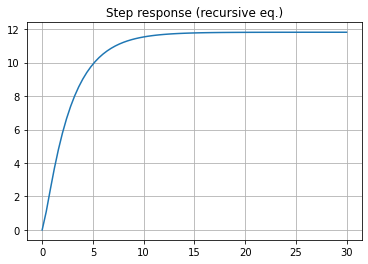

In [4]:
#Estado zero degrau 12V
k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = 12*np.ones(k_max) #step
y = np.empty(k_max)

n=0
y[0] = 0

n=1
y[1] = 0.09077*u[n-1] + 1.209*y[n-1] -0.3012*0

for n in range(2, k_max):
    y[n] = 0.09077*u[n-1] + 1.209*y[n-1] -0.3012*y[n-2]

plt.plot(x,y)
plt.title('Step response (recursive eq.)')
plt.grid()

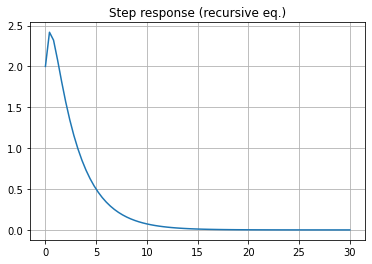

In [5]:
#Entrada zero, y(0)=2V
# ERRADO
k_max = int(np.ceil(tfinal/T)) + 1
x = np.linspace(0, tfinal, k_max)
u = np.zeros(k_max)
y = np.empty(k_max)

n=0
y[0] = 2

n=1
y[1] = 0.09077*u[n-1] + 1.209*y[n-1] -0.3012*0

for n in range(2, k_max):
    y[n] = 0.09077*u[n-1] + 1.209*y[n-1] -0.3012*y[n-2]

plt.plot(x,y)
plt.title('Step response (recursive eq.)')
plt.grid()